NATURAL LANGUAGE PROCESSING "Amazon Reviews" vs "Twitter Comments"


Scraping Data From Amazon

In [3]:
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
from msedge.selenium_tools import Edge, EdgeOptions
import snscrape.modules.twitter as sntwitter

In [6]:
browser = webdriver.Chrome(executable_path='C:/Users/musta/Desktop/chromedriver')
url_lst = []
data_set = []

def get_revies_url(start, end):
    for page in range(start, end):
        url = f"https://www.amazon.com/Fire-TV-Stick-4K-with-Alexa-Voice-Remote/product-reviews/B079QHML21/ref=cm_cr_dp_d_show_all_btm_next{page}?ie=UTF8&reviewerType=all_reviews&pageNumber={page}"
        url_lst.append(url)
    return url_lst

def get_reviews(start, end):
    get_revies_url(start, end)
    for url in url_lst:
        browser.get(url)
        soup = BeautifulSoup(browser.page_source, 'html.parser')
        results = soup.find_all('div', {'class': 'a-section celwidget'})
        
        for review in results:
            try:
                new_review = review.find('span', 'a-size-base review-text review-text-content').text
    
            except AttributeError:
                new_review = ' '
        
            try:
                star = review.find('span', 'a-icon-alt').text
            
            except AttributeError:
                star = ' '
            data_set.append([new_review, star])
    #browser.close()
    return len(data_set)

In [ ]:
get_reviewa(0,500)

In [8]:
df = pd.DataFrame(data_set, columns =['Review', 'Rate'])
df.to_csv('amazon.csv')

In [4]:
amazon = pd.read_csv("amazonnn.csv")

Scraping Tweets From Twitter

In [ ]:
import itertools
from twitter import *
firetv_df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'Fire-TV-Stick near:"Kansas" within:100000km').get_items(), 500000))[['date', 'content']]

In [ ]:
firetv_df.to_csv('fire_tweets.csv')

In [ ]:
#Creating a new dataframe 
firetv_df = pd.DataFrame(firetv_tweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

Uploading Datasets

In [77]:
#Uploading datasets
amazon = pd.read_csv("amazon.csv")
tweets = pd.read_csv("fire_tweets.csv")
tweet_data = tweets.copy()
amazon_data = amazon.copy()

In [78]:
amazon_data.head()

,Unnamed: 0,Review,Rate
0,0,\n\n I received the Fire TV Stick 4K on launc...,5.0 out of 5 stars
1,1,"\n\n Let me tell you, I was super excited for...",3.0 out of 5 stars
2,2,\n\n\n Your browser does not suppor...,4.0 out of 5 stars
3,3,"\n\n Ok, so if your like me you wonder what e...",4.0 out of 5 stars
4,4,\n\n Our main streaming service is DirecTV No...,1.0 out of 5 stars


In [32]:
tweet_data.head()

,Unnamed: 0,date,content
0,0,2021-12-09 18:23:16+00:00,Fire TV Stick 4K Max Review: Worth The Wait ...
1,1,2021-12-09 11:30:16+00:00,New post: Possible FREE $5 Prime Video Credit ...
2,2,2021-12-09 09:05:28+00:00,"@wlrosetyler Yeah, I too love Google Chromecas..."
3,3,2021-12-09 08:04:42+00:00,https://t.co/PxC0jTGGWu\nEnds December 9th 10:...
4,4,2021-12-08 15:15:05+00:00,Possible FREE $5 Prime Video Credit (Amazon Fi...


DATA PREPROCESSING

In [33]:
#Twitter Dataset

In [34]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2271 non-null   int64 
 1   date        2271 non-null   object
 2   content     2271 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.4+ KB


In [35]:
tweet_data.nunique()

Unnamed: 0    2271
date          2271
content       2266
dtype: int64

In [36]:
#droping duplicate values
tweet_data.drop_duplicates(inplace=True)

In [12]:
#Amazon Dataset

In [79]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4882 non-null   int64 
 1   Review      4882 non-null   object
 2   Rate        4882 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.5+ KB


In [14]:
amazon_data.nunique()

Unnamed: 0    4882
Review        4882
Rate             5
dtype: int64

In [80]:
amazon_data["Rate"].value_counts()

5.0 out of 5 stars    2113
1.0 out of 5 stars     913
4.0 out of 5 stars     753
3.0 out of 5 stars     636
2.0 out of 5 stars     467
Name: Rate, dtype: int64

In [81]:
#droping duplicate values
amazon_data.drop_duplicates(inplace=True)

- Cleaning Amazon Dataset

In [82]:
#Filtering non-alphanumeric characters
import re
main_filter= lambda x: re.sub("[^a-z0-9]"," ",x)

In [83]:
amazon_data["Text"] = amazon_data.Review.str.lower()

In [84]:
amazon_data["Text"] = amazon_data.Text.map(main_filter)
amazon_data.head(10)

,Unnamed: 0,Review,Rate,Text
0,0,\n\n I received the Fire TV Stick 4K on launc...,5.0 out of 5 stars,i received the fire tv stick 4k on launch ...
1,1,"\n\n Let me tell you, I was super excited for...",3.0 out of 5 stars,let me tell you i was super excited for t...
2,2,\n\n\n Your browser does not suppor...,4.0 out of 5 stars,your browser does not support h...
3,3,"\n\n Ok, so if your like me you wonder what e...",4.0 out of 5 stars,ok so if your like me you wonder what exa...
4,4,\n\n Our main streaming service is DirecTV No...,1.0 out of 5 stars,our main streaming service is directv now ...
5,5,"\n\n I pre-ordered this a few weeks ago, and ...",5.0 out of 5 stars,i pre ordered this a few weeks ago and it...
6,6,\n\n I have tried it on 4 different TV's (Tos...,1.0 out of 5 stars,i have tried it on 4 different tv s toshi...
7,7,\n\n I found the new 4K (HDR) Firestick to fu...,5.0 out of 5 stars,i found the new 4k hdr firestick to func...
8,8,\n\n So you’ve heard about cutting the cord a...,1.0 out of 5 stars,so you ve heard about cutting the cord and...
9,9,\n\n Just writing this review after getting o...,1.0 out of 5 stars,just writing this review after getting off...


In [85]:
amazon_data["Review"] = amazon_data["Text"]
amazon_data = amazon_data.drop('Text', 1)
amazon_data.head(5)

C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Unnamed: 0,Review,Rate
0,0,i received the fire tv stick 4k on launch ...,5.0 out of 5 stars
1,1,let me tell you i was super excited for t...,3.0 out of 5 stars
2,2,your browser does not support h...,4.0 out of 5 stars
3,3,ok so if your like me you wonder what exa...,4.0 out of 5 stars
4,4,our main streaming service is directv now ...,1.0 out of 5 stars


In [86]:
amazon_data['new_rate'] = amazon_data["Rate"].str[0]

In [87]:
amazon_data["Rate"] = amazon_data["new_rate"]

In [88]:
amazon_data = amazon_data.drop('new_rate', 1)
amazon_data.head()

C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Review,Rate
0,0,i received the fire tv stick 4k on launch ...,5
1,1,let me tell you i was super excited for t...,3
2,2,your browser does not support h...,4
3,3,ok so if your like me you wonder what exa...,4
4,4,our main streaming service is directv now ...,1


In [89]:
amazon_data["Rate"].value_counts()

5    2113
1     913
4     753
3     636
2     467
Name: Rate, dtype: int64

- Cleaning Twitter Dataset

In [37]:
tweet_data["content"] = tweet_data.content.str.lower()
tweet_data

,Unnamed: 0,date,content
0,0,2021-12-09 18:23:16+00:00,fire tv stick 4k max review: worth the wait ...
1,1,2021-12-09 11:30:16+00:00,new post: possible free $5 prime video credit ...
2,2,2021-12-09 09:05:28+00:00,"@wlrosetyler yeah, i too love google chromecas..."
3,3,2021-12-09 08:04:42+00:00,https://t.co/pxc0jtggwu\nends december 9th 10:...
4,4,2021-12-08 15:15:05+00:00,possible free $5 prime video credit (amazon fi...
...,...,...,...
2266,2266,2014-10-27 14:31:49+00:00,does this mean fire tv can’t use a tv’s usb po...
2267,2267,2014-10-27 14:30:33+00:00,“@circa: amazon debuts fire tv stick streaming...
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat.
2269,2269,2014-10-27 13:40:13+00:00,totally just ordered the #amazon fire tv stick...


In [38]:
tweet_data["content"] = tweet_data.content.map(main_filter)
tweet_data.head(10)

,Unnamed: 0,date,content
0,0,2021-12-09 18:23:16+00:00,fire tv stick 4k max review worth the wait ...
1,1,2021-12-09 11:30:16+00:00,new post possible free 5 prime video credit ...
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...
3,3,2021-12-09 08:04:42+00:00,https t co pxc0jtggwu ends december 9th 10 0...
4,4,2021-12-08 15:15:05+00:00,possible free 5 prime video credit amazon fi...
5,5,2021-12-08 14:36:03+00:00,i have a new roku smart tv but have a new ama...
6,6,2021-12-08 04:17:49+00:00,c mo instalar la app de hbo max en un fire tv ...
7,7,2021-12-08 02:44:45+00:00,nicolaweather with fire tv you can only acces...
8,8,2021-12-08 01:39:37+00:00,c mo instalar la app de hbo max en un fire tv ...
9,9,2021-12-08 01:31:34+00:00,win the all new kindle paperwhite and fire t...


There are some tweets which are not English and I prefer to remove them to have better overall rate for the product. It is not working perfectly but I would like to use it. Besides I would like to delete all links

In [40]:
#delete non english words with nltk
import nltk
words = set(nltk.corpus.words.words())
def remove_non_english(text):
    new_text = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return new_text

In [42]:
#Removing links
link_ht = lambda x: re.sub(r"http\S+"," ",x)
link_ww = lambda x: re.sub(r"www.\S+"," ",x)

In [43]:
tweet_data['new_content'] = tweet_data['content'].apply(remove_non_english)
tweet_data["new_content"] = tweet_data.content.map(link_ht).map(link_ww)
tweet_data.head(10)

,Unnamed: 0,date,content,new_content
0,0,2021-12-09 18:23:16+00:00,fire tv stick 4k max review worth the wait ...,fire tv stick 4k max review worth the wait ...
1,1,2021-12-09 11:30:16+00:00,new post possible free 5 prime video credit ...,new post possible free 5 prime video credit ...
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...,wlrosetyler yeah i too love google chromecas...
3,3,2021-12-09 08:04:42+00:00,https t co pxc0jtggwu ends december 9th 10 0...,t co pxc0jtggwu ends december 9th 10 00 pm...
4,4,2021-12-08 15:15:05+00:00,possible free 5 prime video credit amazon fi...,possible free 5 prime video credit amazon fi...
5,5,2021-12-08 14:36:03+00:00,i have a new roku smart tv but have a new ama...,i have a new roku smart tv but have a new ama...
6,6,2021-12-08 04:17:49+00:00,c mo instalar la app de hbo max en un fire tv ...,c mo instalar la app de hbo max en un fire tv ...
7,7,2021-12-08 02:44:45+00:00,nicolaweather with fire tv you can only acces...,nicolaweather with fire tv you can only acces...
8,8,2021-12-08 01:39:37+00:00,c mo instalar la app de hbo max en un fire tv ...,c mo instalar la app de hbo max en un fire tv ...
9,9,2021-12-08 01:31:34+00:00,win the all new kindle paperwhite and fire t...,win the all new kindle paperwhite and fire t...


In [44]:
tweet_data.drop_duplicates()
tweet_data.nunique()

Unnamed: 0     2271
date           2271
content        2266
new_content    2266
dtype: int64

I will apply another method to delete non english words because I am not satisfied with above one

In [45]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
result = lambda x: detect(x)

In [46]:
tweet_data["Language"] = tweet_data["new_content"].apply(result)

In [47]:
tweet_data["Language"].value_counts()

en    2153
es      61
it      16
sk      15
sv      12
da       2
fr       2
hr       2
pl       1
so       1
tl       1
id       1
nl       1
pt       1
hu       1
sl       1
Name: Language, dtype: int64

By the help of language detection I realized that I have 16 different languages and only 2153 of them are English so I will remove all languages except English

In [48]:
tweet_data_filtered = tweet_data[tweet_data['Language'] == "en"]
tweet_data_filtered

,Unnamed: 0,date,content,new_content,Language
0,0,2021-12-09 18:23:16+00:00,fire tv stick 4k max review worth the wait ...,fire tv stick 4k max review worth the wait ...,en
1,1,2021-12-09 11:30:16+00:00,new post possible free 5 prime video credit ...,new post possible free 5 prime video credit ...,en
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...,wlrosetyler yeah i too love google chromecas...,en
3,3,2021-12-09 08:04:42+00:00,https t co pxc0jtggwu ends december 9th 10 0...,t co pxc0jtggwu ends december 9th 10 00 pm...,en
4,4,2021-12-08 15:15:05+00:00,possible free 5 prime video credit amazon fi...,possible free 5 prime video credit amazon fi...,en
...,...,...,...,...,...
2266,2266,2014-10-27 14:31:49+00:00,does this mean fire tv can t use a tv s usb po...,does this mean fire tv can t use a tv s usb po...,en
2267,2267,2014-10-27 14:30:33+00:00,circa amazon debuts fire tv stick streaming...,circa amazon debuts fire tv stick streaming...,en
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat,the amazon fire tv stick looks neat,en
2269,2269,2014-10-27 13:40:13+00:00,totally just ordered the amazon fire tv stick...,totally just ordered the amazon fire tv stick...,en


In [49]:
tweet_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2270
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2153 non-null   int64 
 1   date         2153 non-null   object
 2   content      2153 non-null   object
 3   new_content  2153 non-null   object
 4   Language     2153 non-null   object
dtypes: int64(1), object(4)
memory usage: 100.9+ KB


I delete duplicate tweets and reached the last version of the tweet dataset

In [50]:
tweet_data_filtered = tweet_data_filtered.drop_duplicates(subset=['new_content'], keep='first')
tweet_data_filtered

,Unnamed: 0,date,content,new_content,Language
0,0,2021-12-09 18:23:16+00:00,fire tv stick 4k max review worth the wait ...,fire tv stick 4k max review worth the wait ...,en
1,1,2021-12-09 11:30:16+00:00,new post possible free 5 prime video credit ...,new post possible free 5 prime video credit ...,en
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...,wlrosetyler yeah i too love google chromecas...,en
3,3,2021-12-09 08:04:42+00:00,https t co pxc0jtggwu ends december 9th 10 0...,t co pxc0jtggwu ends december 9th 10 00 pm...,en
4,4,2021-12-08 15:15:05+00:00,possible free 5 prime video credit amazon fi...,possible free 5 prime video credit amazon fi...,en
...,...,...,...,...,...
2266,2266,2014-10-27 14:31:49+00:00,does this mean fire tv can t use a tv s usb po...,does this mean fire tv can t use a tv s usb po...,en
2267,2267,2014-10-27 14:30:33+00:00,circa amazon debuts fire tv stick streaming...,circa amazon debuts fire tv stick streaming...,en
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat,the amazon fire tv stick looks neat,en
2269,2269,2014-10-27 13:40:13+00:00,totally just ordered the amazon fire tv stick...,totally just ordered the amazon fire tv stick...,en


In [51]:
tweet_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2270
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2148 non-null   int64 
 1   date         2148 non-null   object
 2   content      2148 non-null   object
 3   new_content  2148 non-null   object
 4   Language     2148 non-null   object
dtypes: int64(1), object(4)
memory usage: 100.7+ KB


In [52]:
tweet_data = tweet_data_filtered.drop(['content', 'Language'], axis=1)
tweet_data

,Unnamed: 0,date,new_content
0,0,2021-12-09 18:23:16+00:00,fire tv stick 4k max review worth the wait ...
1,1,2021-12-09 11:30:16+00:00,new post possible free 5 prime video credit ...
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...
3,3,2021-12-09 08:04:42+00:00,t co pxc0jtggwu ends december 9th 10 00 pm...
4,4,2021-12-08 15:15:05+00:00,possible free 5 prime video credit amazon fi...
...,...,...,...
2266,2266,2014-10-27 14:31:49+00:00,does this mean fire tv can t use a tv s usb po...
2267,2267,2014-10-27 14:30:33+00:00,circa amazon debuts fire tv stick streaming...
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat
2269,2269,2014-10-27 13:40:13+00:00,totally just ordered the amazon fire tv stick...


In [53]:
length = lambda x: len(x).split()
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)
tweet_data["length"] = tweet_data["new_content"].apply(lambda x: 0 if has_numbers(x) else 1)
tweet_data

,Unnamed: 0,date,new_content,length
0,0,2021-12-09 18:23:16+00:00,fire tv stick 4k max review worth the wait ...,0
1,1,2021-12-09 11:30:16+00:00,new post possible free 5 prime video credit ...,0
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...,1
3,3,2021-12-09 08:04:42+00:00,t co pxc0jtggwu ends december 9th 10 00 pm...,0
4,4,2021-12-08 15:15:05+00:00,possible free 5 prime video credit amazon fi...,0
...,...,...,...,...
2266,2266,2014-10-27 14:31:49+00:00,does this mean fire tv can t use a tv s usb po...,0
2267,2267,2014-10-27 14:30:33+00:00,circa amazon debuts fire tv stick streaming...,0
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat,1
2269,2269,2014-10-27 13:40:13+00:00,totally just ordered the amazon fire tv stick...,1


In [54]:
tweet_data = tweet_data[tweet_data['length'] == 1]
tweet_data = tweet_data.drop('length', axis=1)
tweet_data

,Unnamed: 0,date,new_content
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...
5,5,2021-12-08 14:36:03+00:00,i have a new roku smart tv but have a new ama...
7,7,2021-12-08 02:44:45+00:00,nicolaweather with fire tv you can only acces...
13,13,2021-12-07 20:14:36+00:00,a very handy feature of fire tv stick and fire...
33,33,2021-12-07 01:40:51+00:00,the new amazon fire tv stick layout is absolu...
...,...,...,...
2256,2256,2014-10-27 17:52:00+00:00,fire tv stick sounds like a primitive name f...
2261,2261,2014-10-27 16:49:02+00:00,i kinda want the fire tv stick just because of...
2262,2262,2014-10-27 16:18:53+00:00,chromecast fire t...
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat


TFIDF and Linear SVM

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [43]:
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,10), analyzer='char') #“Term Frequency — Inverse Document Frequency”

In [44]:
X = tfidf.fit_transform(amazon_data["Review"])
y = amazon_data["Rate"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
X_train.shape

(3905, 20000)

In [47]:
X_test.shape

(977, 20000)

In [48]:
clf = LinearSVC(C=10, class_weight="balanced")
clf.fit(X_train, y_train)

LinearSVC(C=10, class_weight='balanced')

In [49]:
y_pred = clf.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.59      0.59       211
           2       0.10      0.09      0.09        90
           3       0.14      0.14      0.14       124
           4       0.31      0.30      0.31       139
           5       0.76      0.78      0.77       413

    accuracy                           0.53       977
   macro avg       0.38      0.38      0.38       977
weighted avg       0.52      0.53      0.52       977



My accuracy is very low so I decided to have model tuning process for better results

Model Tuning

In [53]:
svc_params = {"C": [0.01, 0.1, 0.5, 1,]}  
svc_cv_model = GridSearchCV(clf, svc_params, cv=5).fit(X_train, y_train)

In [54]:
svc_cv_model.best_params_

{'C': 0.1}

Final Model With SVC

In [55]:
clf_tuned = LinearSVC(C=0.1, class_weight="balanced")
clf_tuned.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight='balanced')

In [56]:
y_pred = clf_tuned.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.72      0.64       211
           2       0.15      0.09      0.11        90
           3       0.21      0.15      0.17       124
           4       0.32      0.17      0.22       139
           5       0.72      0.87      0.79       413

    accuracy                           0.58       977
   macro avg       0.40      0.40      0.39       977
weighted avg       0.51      0.58      0.54       977



After tuning the model accuracy is increased but still not enugh. 

MAKING PREDICTION WITH TWEETS

In [58]:
tweet_x = tfidf.fit_transform(tweet_data["new_content"])

In [59]:
tweet_data["stars"] = clf.predict(tweet_x)

In [60]:
tweet_data

,Unnamed: 0,date,new_content,stars
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...,3
5,5,2021-12-08 14:36:03+00:00,i have a new roku smart tv but have a new ama...,5
7,7,2021-12-08 02:44:45+00:00,nicolaweather with fire tv you can only acces...,5
13,13,2021-12-07 20:14:36+00:00,a very handy feature of fire tv stick and fire...,5
33,33,2021-12-07 01:40:51+00:00,the new amazon fire tv stick layout is absolu...,5
...,...,...,...,...
2256,2256,2014-10-27 17:52:00+00:00,fire tv stick sounds like a primitive name f...,5
2261,2261,2014-10-27 16:49:02+00:00,i kinda want the fire tv stick just because of...,5
2262,2262,2014-10-27 16:18:53+00:00,chromecast fire t...,3
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat,5


In [61]:
tweet_data["stars"].value_counts()

5    637
3     22
4      2
1      2
Name: stars, dtype: int64

In [62]:
tweet_data["stars"] = tweet_data["stars"].astype("int64")

In [63]:
overall_tweet_rates = tweet_data["stars"].mean()
print(overall_tweet_rates)

4.918552036199095


In [65]:
sentence = "Never buy this product"
vec = tfidf.transform([sentence])
clf.predict(vec)

array(['5'], dtype=object)

The result of the first model is not good so I will use another dataset which provided by Amazon itself

CREATING NEW MODEL WITH NEW DATASET

In [2]:
import pandas as pd 
tsv_file='electronic_reviews.tsv'
csv_table=pd.read_table(tsv_file,sep='\n')
csv_table.to_csv('new_name.csv',index=False)

In [4]:
amazon_df = pd.read_csv("new_name.csv", sep="\t")

In [5]:
amazon_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413.0,R2MTG1GCZLR2DK,B00428R89M,112201306.0,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5.0,0.0,0.0,N,Y,Five Stars,As described.,2015-08-31
1,US\t49668221\tR2HBOEM8LE9928\tB000068O48\t7345...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,12338275.0,R1P4RW1R9FDPEE,B000GGKOG8,614448099.0,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968.0,R1EBPM82ENI67M,B000NU4OTA,72265257.0,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1.0,0.0,0.0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619.0,R372S58V6D11AT,B00JOQIO6S,308169188.0,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [6]:
amazon_df = amazon_df[amazon_df["marketplace"]=='US']

The data was not clean enough so I used above code for the data to clean. Now I have much more bigger dataset to train and test

In [7]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034186 entries, 0 to 3093867
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   marketplace        1034186 non-null  object 
 1   customer_id        1034186 non-null  float64
 2   review_id          1034186 non-null  object 
 3   product_id         1034186 non-null  object 
 4   product_parent     1034186 non-null  float64
 5   product_title      1034185 non-null  object 
 6   product_category   1034186 non-null  object 
 7   star_rating        1034186 non-null  float64
 8   helpful_votes      1034186 non-null  float64
 9   total_votes        1034186 non-null  float64
 10  vine               1034186 non-null  object 
 11  verified_purchase  1034186 non-null  object 
 12  review_headline    1034177 non-null  object 
 13  review_body        1034117 non-null  object 
 14  review_date        1034186 non-null  object 
dtypes: float64(5), object(10)
memory

I will have the same process with other dataset which I scrapped from Amazon but before it I have to clean my dataset

In [10]:
amazon_df = amazon_df[amazon_df["star_rating"] != np.NaN]
amazon_df = amazon_df[amazon_df["review_body"] != np.NaN]

In [11]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034186 entries, 0 to 3093867
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   marketplace        1034186 non-null  object 
 1   customer_id        1034186 non-null  float64
 2   review_id          1034186 non-null  object 
 3   product_id         1034186 non-null  object 
 4   product_parent     1034186 non-null  float64
 5   product_title      1034185 non-null  object 
 6   product_category   1034186 non-null  object 
 7   star_rating        1034186 non-null  float64
 8   helpful_votes      1034186 non-null  float64
 9   total_votes        1034186 non-null  float64
 10  vine               1034186 non-null  object 
 11  verified_purchase  1034186 non-null  object 
 12  review_headline    1034177 non-null  object 
 13  review_body        1034117 non-null  object 
 14  review_date        1034186 non-null  object 
dtypes: float64(5), object(10)
memory

In [12]:
amazon_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413.0,R2MTG1GCZLR2DK,B00428R89M,112201306.0,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5.0,0.0,0.0,N,Y,Five Stars,As described.,2015-08-31
2,US,12338275.0,R1P4RW1R9FDPEE,B000GGKOG8,614448099.0,Channel Master Titan 2 Antenna Preamplifier,Electronics,5.0,1.0,1.0,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968.0,R1EBPM82ENI67M,B000NU4OTA,72265257.0,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1.0,0.0,0.0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619.0,R372S58V6D11AT,B00JOQIO6S,308169188.0,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5.0,1.0,1.0,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31
5,US,21257820.0,R1A4514XOYI1PD,B008NCD2LG,976385982.0,Pioneer SP-BS22-LR Andrew Jones Designed Books...,Electronics,5.0,1.0,1.0,N,Y,Five Stars,The quality on these speakers is insanely good...,2015-08-31


In [13]:
amazon_df = amazon_df[["star_rating", "review_body"]]
amazon_df.head()

,star_rating,review_body
0,5.0,As described.
2,5.0,Works pissa
3,1.0,Did not work at all.
4,5.0,Works well. Bass is somewhat lacking but is pr...
5,5.0,The quality on these speakers is insanely good...


My dataset is based on furniture but I will apply it for the 4K fire stick product. So my project will be more interesting.

In [16]:
amazon_df["review_body"] = amazon_df.review_body.str.lower()
amazon_df["review_body"] = amazon_df.review_body.apply(str)  #TypeError: expected string or bytes-like object
amazon_df["review_body"] = amazon_df.review_body.map(main_filter)
amazon_df.head(10)

,star_rating,review_body
0,5.0,as described
2,5.0,works pissa
3,1.0,did not work at all
4,5.0,works well bass is somewhat lacking but is pr...
5,5.0,the quality on these speakers is insanely good...
6,5.0,wish i could give this product more than five ...
7,5.0,works great
8,4.0,great sound and compact battery life seems go...
9,4.0,it works well
11,5.0,love clock radio cd player easy to operate


In [17]:
amazon_df.isna().sum()

star_rating    0
review_body    0
dtype: int64

In [18]:
amazon_df["star_rating"].value_counts()

5.0    656262
4.0    152082
1.0    117878
3.0     61612
2.0     46352
Name: star_rating, dtype: int64

In [19]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,6), analyzer='char')

In [20]:
X = tfidf.fit_transform(amazon_df["review_body"])
y = amazon_df["star_rating"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X_train.shape

(827348, 10000)

In [23]:
X_test.shape

(206838, 10000)

In [24]:
clf = LinearSVC(C=10, class_weight="balanced")
clf.fit(X_train, y_train)

C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=10, class_weight='balanced')

In [25]:
y_pred = clf.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.78      0.72     23460
         2.0       0.26      0.30      0.28      9300
         3.0       0.29      0.38      0.33     12212
         4.0       0.44      0.25      0.32     30329
         5.0       0.86      0.88      0.87    131537

    accuracy                           0.72    206838
   macro avg       0.50      0.52      0.50    206838
weighted avg       0.71      0.72      0.71    206838



MODEL TUNING

In [163]:
svc_params = {"C": [0.1, 0.5, 1, 3, 5, 10]}  
svc_cv_model = GridSearchCV(clf, svr_params, cv=5).fit(X_train, y_train)

C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [164]:
svc_cv_model.best_params_

{'C': 0.1}

FINAL MODEL

In [27]:
clf_tuned = LinearSVC(C=0.1, class_weight="balanced")
clf_tuned.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight='balanced')

In [28]:
y_pred = clf_tuned.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.66      0.79      0.72     23460
         2.0       0.27      0.29      0.28      9300
         3.0       0.30      0.39      0.34     12212
         4.0       0.45      0.24      0.31     30329
         5.0       0.85      0.89      0.87    131537

    accuracy                           0.72    206838
   macro avg       0.51      0.52      0.50    206838
weighted avg       0.71      0.72      0.71    206838



MAKING PREDICTION WITH TWEETS

In [55]:
tweet_x = tfidf.fit_transform(tweet_data["new_content"])

In [56]:
tweet_data["stars"] = clf.predict(tweet_x)

In [57]:
tweet_data

,Unnamed: 0,date,new_content,stars
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...,5.0
5,5,2021-12-08 14:36:03+00:00,i have a new roku smart tv but have a new ama...,4.0
7,7,2021-12-08 02:44:45+00:00,nicolaweather with fire tv you can only acces...,5.0
13,13,2021-12-07 20:14:36+00:00,a very handy feature of fire tv stick and fire...,2.0
33,33,2021-12-07 01:40:51+00:00,the new amazon fire tv stick layout is absolu...,5.0
...,...,...,...,...
2256,2256,2014-10-27 17:52:00+00:00,fire tv stick sounds like a primitive name f...,4.0
2261,2261,2014-10-27 16:49:02+00:00,i kinda want the fire tv stick just because of...,5.0
2262,2262,2014-10-27 16:18:53+00:00,chromecast fire t...,5.0
2268,2268,2014-10-27 13:41:33+00:00,the amazon fire tv stick looks neat,5.0


In [58]:
tweet_data["stars"].value_counts()

5.0    466
2.0     84
3.0     48
4.0     41
1.0     24
Name: stars, dtype: int64

In [59]:
one_star = tweet_data[tweet_data["stars"] == 1.0]

In [60]:
liste = one_star["new_content"].head(10)
for k in liste:
    print(k)

anyone tried  amazonluna on a fire tv device  wondering if it s worth hooking to my stick to try it  i tried it on pc and mobile already 
 paramountplus new fire tv stick  trying to sign into the paramount  app  it doesn t like the password  same password works on the laptop and phone  help 
 amazonluna do i need the luna controller to play games on a fire tv stick 
 amazonluna i m trying to get the luna controller to work on my fire tv stick  but when i launch the luna app the controller does not connect   it works fine on pc over wi fi   if i switch the game to the tv the controller drops the wi fi connection   please help 
 added hbo max and peacock tv into my amazon fire tv stick  unofficial      
 designationsix or buy a roku or fire tv stick and cut the cord altogether 
 amazonhelp using the app through fire stick and fire tv
now that i have a fire tv it really is super unnecessary to also have an apple tv  amp  fire stick but it is what it is at this point  lol
 amazonfiretv why

In [61]:
tweet_data["stars"] = tweet_data["stars"].astype("int64")

In [62]:
overall_tweet_rates = tweet_data["stars"].mean()
print(overall_tweet_rates)

4.268476621417798


In [64]:
sentence = "I didn't like this product"
vec = tfidf.transform([sentence])
clf.predict(vec)

array([2.])

In [65]:
sentence = "I didn't like, it is the worst one"
vec = tfidf.transform([sentence])
clf.predict(vec)

array([2.])

In [90]:
sentence = "It worths its price"
vec = tfidf.transform([sentence])
clf.predict(vec)

array([4.])

In [75]:
sentence = "I love the product, it's a great product"
vec = tfidf.transform([sentence])
clf.predict(vec)

array([5.])

In [76]:
sentence = "Damn product, I want a refund."
vec = tfidf.transform([sentence])
clf.predict(vec)

array([1.])

Pozitive - Negative -Neutral Tweets AND SENTIMENT ANALYZE

In [92]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

In [178]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for text in tweet_data["new_content"]:
#print(tweet.text)
    tweet_list.append(text)
    analysis = TextBlob(text)
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(text)
        negative += 1
    elif pos > neg:
        positive_list.append(text)
        positive += 1
    elif pos == neg:
        neutral_list.append(text)
        neutral += 1

In [179]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  663
positive number:  211
negative number:  449
neutral number:  3


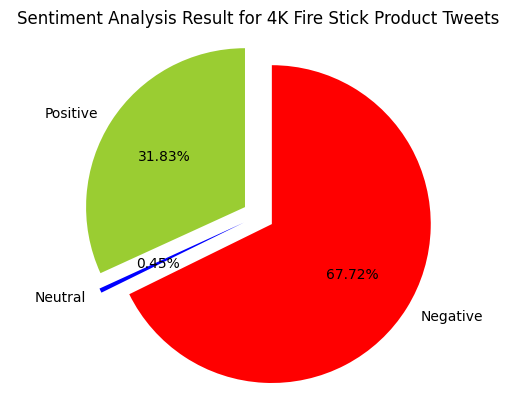

In [181]:
#Creating PieCart
import matplotlib.pyplot as plt
labels = ["Positive" , "Neutral","Negative"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
plt.pie(sizes, labels=labels, colors=colors, startangle=90, explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.style.use("default")
plt.title("Sentiment Analysis Result for 4K Fire Stick Product Tweets")
plt.axis("equal")
plt.show()

In [183]:
#Calculating Negative, Positive, Neutral and Compound values
#polarity, subjectivity, sentiment, negative, positive, neutral and compound parameters.
tweet_data[["polarity", "subjectivity"]] = tweet_data["new_content"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_data["new_content"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    if neg > pos:
        tweet_data.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        tweet_data.loc[index, "sentiment"] = "positive"
    else:
        tweet_data.loc[index, "sentiment"] = "neutral"
        tweet_data.loc[index, "neg"] = neg
        tweet_data.loc[index, "neu"] = neu
        tweet_data.loc[index, "pos"] = pos
        tweet_data.loc[index, "compound"] = comp
tweet_data.head(10)

,Unnamed: 0,date,new_content,stars,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,2,2021-12-09 09:05:28+00:00,wlrosetyler yeah i too love google chromecas...,4,-0.150000,0.750000,positive,NaN,NaN,NaN,NaN
5,5,2021-12-08 14:36:03+00:00,i have a new roku smart tv but have a new ama...,5,0.162338,0.517316,negative,NaN,NaN,NaN,NaN
7,7,2021-12-08 02:44:45+00:00,nicolaweather with fire tv you can only acces...,5,0.187500,0.475000,negative,NaN,NaN,NaN,NaN
13,13,2021-12-07 20:14:36+00:00,a very handy feature of fire tv stick and fire...,2,0.526667,0.583333,negative,NaN,NaN,NaN,NaN
33,33,2021-12-07 01:40:51+00:00,the new amazon fire tv stick layout is absolu...,5,0.168182,0.677273,negative,NaN,NaN,NaN,NaN
43,43,2021-12-05 23:26:53+00:00,well my google chromecast won t stream amazon ...,5,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
46,46,2021-12-05 17:41:03+00:00,i was about to get some amazonhelp fire tv st...,5,-0.192857,0.721429,negative,NaN,NaN,NaN,NaN
49,49,2021-12-05 00:49:24+00:00,doc revan this is a fire tv stick on an old t...,2,0.100000,0.200000,negative,NaN,NaN,NaN,NaN
66,66,2021-12-03 08:10:21+00:00,the other day i bought a amazon fire tv stick ...,4,-0.162500,0.237500,negative,NaN,NaN,NaN,NaN
75,75,2021-12-02 08:28:42+00:00,entering friends living room ohh heyy nice t...,5,0.338095,0.647619,positive,NaN,NaN,NaN,NaN


We can split our dataset in 3 different dataset as positive, negative and neutral

In [184]:
tweet_data_negative = tweet_data[tweet_data["sentiment"]=="negative"]
tweet_data_positive = tweet_data[tweet_data["sentiment"]=="positive"]
tweet_data_neutral = tweet_data[tweet_data["sentiment"]=="neutral"]

Count Values

In [185]:
def column_count_values(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total Tweets","Percentage"])
#Count_values for sentiment
column_count_values(tweet_data,"sentiment")

,Total,Percentage
negative,449,67.72
positive,211,31.83
neutral,3,0.45


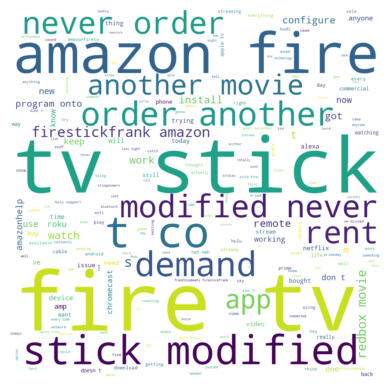

In [191]:
#Creating wordcloud for negative sentiment
import numpy as np
from PIL import Image
from wordcloud import WordCloud


text = " ".join(review for review in tweet_data_negative.new_content)
wordcloud = WordCloud(width = 1000, height = 1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Appliying Countvectorizer

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(min_df=10) # ignore terms that appeared in less than 4 documents 
countVector = countVectorizer.fit_transform(tweet_data["new_content"])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

663 Number of reviews has 160 words


C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,about,alexa,all,also,amazon,amazonhelp,amp,an,and,another,...,who,why,will,with,work,working,works,would,you,your
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,2,0,0,0,0,2,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
# column_name = list(count_vect_df) >> getting all column names as list 
column_names = [x for x in list(count_vect_df) if len(x) > 4]

Most Used Words

In [195]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
fire,730
stick,685
the,426
amazon,422
on,275
my,247
and,230
to,227
co,179
it,172


Working With N-Grams

In [199]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tweet_data["new_content"],(2,2),20)
n2_bigrams

[('tv stick', 622),
 ('amazon tv', 354),
 ('stick modified', 145),
 ('firestickfrank amazon', 80),
 ('order movie', 76),
 ('modified order', 76),
 ('movie demand', 74),
 ('demand rent', 74),
 ('rent redbox', 43),
 ('redbox movie', 43),
 ('modified install', 26),
 ('install configure', 24),
 ('configure program', 23),
 ('modified free', 21),
 ('free tech', 20),
 ('tech support', 19),
 ('got tv', 16),
 ('apple tv', 15),
 ('stick tv', 14),
 ('stick remote', 14)]

In [200]:
n3_bigrams = get_top_n_gram(tweet_data["new_content"],(3,3),20)
n3_bigrams

[('amazon tv stick', 343),
 ('tv stick modified', 145),
 ('firestickfrank amazon tv', 80),
 ('stick modified order', 76),
 ('modified order movie', 75),
 ('order movie demand', 74),
 ('movie demand rent', 74),
 ('demand rent redbox', 43),
 ('rent redbox movie', 43),
 ('stick modified install', 26),
 ('modified install configure', 24),
 ('install configure program', 23),
 ('stick modified free', 21),
 ('modified free tech', 20),
 ('free tech support', 19),
 ('got tv stick', 15),
 ('stick modified watch', 13),
 ('tv stick remote', 11),
 ('new tv stick', 11),
 ('new amazon tv', 8)]

AMAZON DATA SENTIMENT ANALYZE

In [93]:
positive = 0
negative = 0
neutral = 0
polarity = 0
review_list = []
neutral_list = []
negative_list = []
positive_list = []

for text in amazon_data["Review"]:
#print(tweet.text)
    review_list.append(text)
    analysis = TextBlob(text)
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(text)
        negative += 1
    elif pos > neg:
        positive_list.append(text)
        positive += 1
    elif pos == neg:
        neutral_list.append(text)
        neutral += 1

In [94]:
#Number of Tweets (Total, Positive, Negative, Neutral)
review_list = pd.DataFrame(review_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(review_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  4882
positive number:  3596
negative number:  1263
neutral number:  23


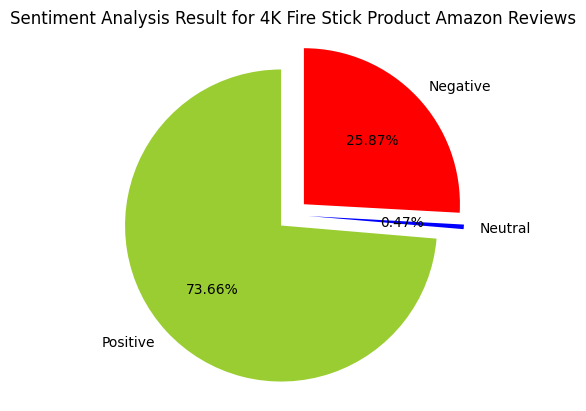

In [96]:
#Creating PieCart
import matplotlib.pyplot as plt
labels = ["Positive" , "Neutral","Negative"]
sizes = [positive, neutral, negative]
colors = ["yellowgreen", "blue","red"]
plt.pie(sizes, labels=labels, colors=colors, startangle=90, explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.style.use("default")
plt.title("Sentiment Analysis Result for 4K Fire Stick Product Amazon Reviews")
plt.axis("equal")
plt.show()

In [97]:
#Calculating Negative, Positive, Neutral and Compound values
#polarity, subjectivity, sentiment, negative, positive, neutral and compound parameters.
amazon_data[["polarity", "subjectivity"]] = amazon_data["Review"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in amazon_data["Review"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    if neg > pos:
        amazon_data.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        amazon_data.loc[index, "sentiment"] = "positive"
    else:
        amazon_data.loc[index, "sentiment"] = "neutral"
        amazon_data.loc[index, "neg"] = neg
        amazon_data.loc[index, "neu"] = neu
        amazon_data.loc[index, "pos"] = pos
        amazon_data.loc[index, "compound"] = comp
amazon_data.head(10)

,Unnamed: 0,Review,Rate,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,0,i received the fire tv stick 4k on launch ...,5,0.243158,0.495351,positive,NaN,NaN,NaN,NaN
1,1,let me tell you i was super excited for t...,3,0.083609,0.470535,positive,NaN,NaN,NaN,NaN
2,2,your browser does not support h...,4,0.169131,0.454284,positive,NaN,NaN,NaN,NaN
3,3,ok so if your like me you wonder what exa...,4,0.156886,0.403819,positive,NaN,NaN,NaN,NaN
4,4,our main streaming service is directv now ...,1,0.082316,0.378671,negative,NaN,NaN,NaN,NaN
5,5,i pre ordered this a few weeks ago and it...,5,0.098687,0.431086,positive,NaN,NaN,NaN,NaN
6,6,i have tried it on 4 different tv s toshi...,1,0.000000,0.362500,negative,NaN,NaN,NaN,NaN
7,7,i found the new 4k hdr firestick to func...,5,0.163149,0.556331,negative,NaN,NaN,NaN,NaN
8,8,so you ve heard about cutting the cord and...,1,0.011702,0.522061,negative,NaN,NaN,NaN,NaN
9,9,just writing this review after getting off...,1,-0.054697,0.365455,positive,NaN,NaN,NaN,NaN


In [98]:
amazon_data_negative = amazon_data[amazon_data["sentiment"]=="negative"]
amazon_data_positive = amazon_data[amazon_data["sentiment"]=="positive"]
amazon_data_neutral = amazon_data[amazon_data["sentiment"]=="neutral"]

In [99]:
def column_count_values(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total Reviews","Percentage"])
#Count_values for sentiment
column_count_values(amazon_data,"sentiment")

,Total Reviews,Percentage
positive,3596,73.66
negative,1263,25.87
neutral,23,0.47


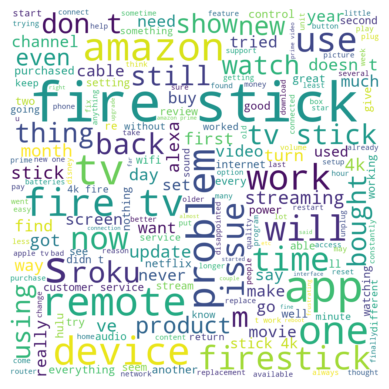

In [101]:
#Creating wordcloud for negative sentiment
import numpy as np
from PIL import Image
from wordcloud import WordCloud


text = " ".join(review for review in amazon_data_negative.Review)
wordcloud = WordCloud(width = 1000, height = 1000, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(min_df=10) # ignore terms that appeared in less than 4 documents 
countVector = countVectorizer.fit_transform(amazon_data["Review"])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

4882 Number of reviews has 3041 words


C:\Users\musta\Anaconda3\envs\rstudio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,1080,1080p,11,12,120,13,...,yet,you,young,your,yourself,youtube,youtubetv,yr,yrs,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,0
2,0,0,4,4,0,1,1,1,0,0,...,1,38,0,8,0,3,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,18,0,5,0,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [103]:
# column_name = list(count_vect_df) >> getting all column names as list 
column_names = [x for x in list(count_vect_df) if len(x) > 4]

In [104]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
to,24724
and,21181
it,18477
is,10994
tv,9876
of,8968
my,8856
that,8375
for,8100
on,7996


In [105]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(amazon_data["Review"],(2,2),20)
n2_bigrams

[('tv stick', 1193),
 ('stick 4k', 641),
 ('smart tv', 634),
 ('4k stick', 560),
 ('amazon prime', 538),
 ('apple tv', 476),
 ('4k tv', 379),
 ('prime video', 353),
 ('customer service', 302),
 ('works great', 271),
 ('tv remote', 262),
 ('turn tv', 258),
 ('picture quality', 257),
 ('voice recognition', 252),
 ('home screen', 249),
 ('streaming device', 229),
 ('easy use', 216),
 ('remote control', 214),
 ('streaming services', 212),
 ('firestick 4k', 212)]

In [106]:
n3_bigrams = get_top_n_gram(amazon_data["Review"],(3,3),20)
n3_bigrams

[('tv stick 4k', 324),
 ('amazon prime video', 84),
 ('amazon tv stick', 70),
 ('samsung smart tv', 62),
 ('amazon customer service', 62),
 ('4k tv stick', 59),
 ('don 4k tv', 51),
 ('new tv stick', 48),
 ('new 4k stick', 47),
 ('netflix amazon prime', 46),
 ('amazon tech support', 46),
 ('blu ray player', 45),
 ('prime video app', 42),
 ('apple tv 4k', 42),
 ('alexa voice remote', 42),
 ('tv sound bar', 42),
 ('tv smart tv', 40),
 ('remote turn tv', 38),
 ('voice recognition alexa', 36),
 ('movies tv shows', 35)]